## Modelo Previsão do Preço do Imóvel

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

#### Sobre a base de dados
Os dados utilizados nesse modelo de regressão linar foram extraidos da plataforma Kaggle, são dados fictícios utilizados para realizar treinamentos e testes de machine learning

#### Objetivo
O princial objetivo desse modelo é prever o valor do preço do imóvel utilizando as informações das variáveis explicativas aplicadas ao modelo de regressão linear

#### Dados:
<ul style='font-size: 14px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dados = pd.read_csv('dados/HousePrices_HalfMil.csv', sep = ';')

In [10]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


In [11]:
dados.shape

(1000, 7)

### Estatísticas descritivas

In [12]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


### Matriz de correlação

In [13]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


In [15]:
import seaborn as sns
sns.set_palette("Accent")
sns.set_style("darkgrid")

### Análises gráficas

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Valor (R$)'>

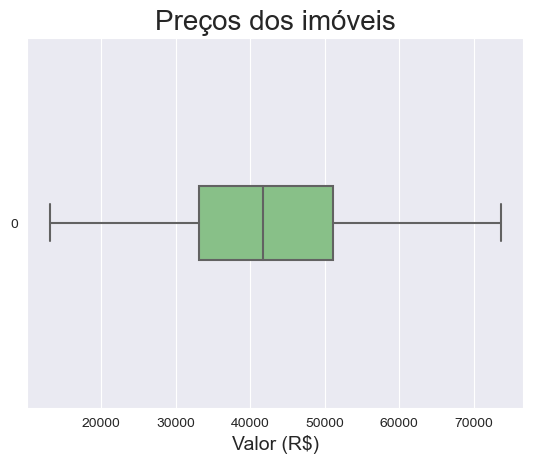

In [16]:
ax = sns.boxplot(data=dados['precos'], orient='h', width=0.2)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Valor (R$)', fontsize=14)
ax

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Valor (R$)', ylabel='Garagem'>

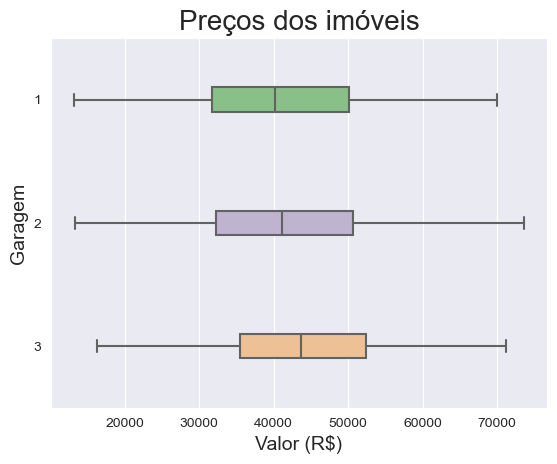

In [17]:
ax = sns.boxplot(y = 'garagem', x = 'precos', data=dados, orient='h', width=0.2)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Valor (R$)', fontsize=14)
ax.set_ylabel('Garagem', fontsize=14)
ax


<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Valor (R$)', ylabel='Banheiros'>

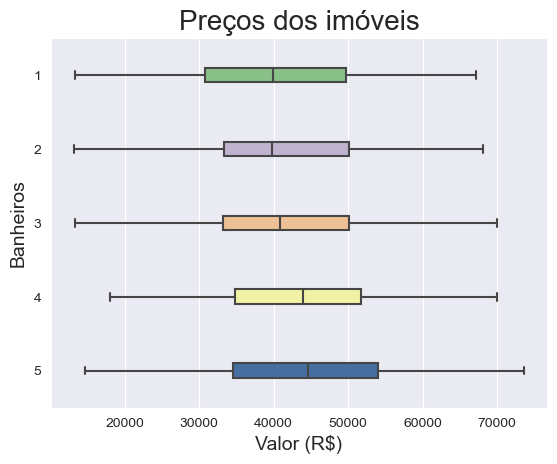

In [18]:
ax = sns.boxplot(y = 'banheiros', x = 'precos', data=dados, orient='h', width=0.2)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Valor (R$)', fontsize=14)
ax.set_ylabel('Banheiros', fontsize=14)
ax

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Valor (R$)', ylabel='Lareira'>

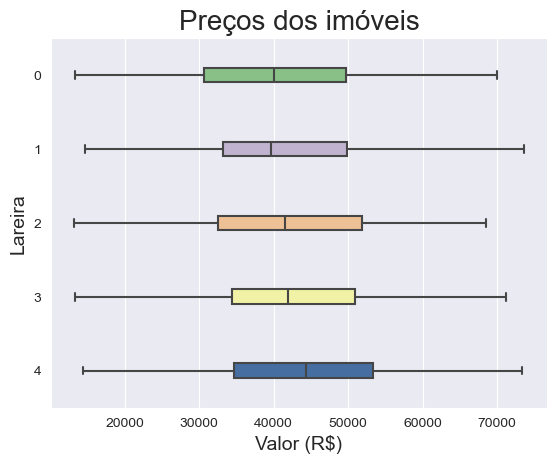

In [19]:
ax = sns.boxplot(y = 'lareira', x = 'precos', data=dados, orient='h', width=0.2)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Valor (R$)', fontsize=14)
ax.set_ylabel('Lareira', fontsize=14)
ax

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Valor (R$)', ylabel='Mármore'>

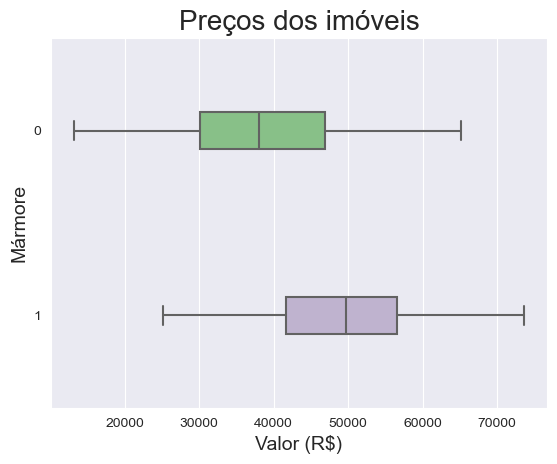

In [20]:
ax = sns.boxplot(y = 'marmore', x = 'precos', data=dados, orient='h', width=0.2)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Valor (R$)', fontsize=14)
ax.set_ylabel('Mármore', fontsize=14)
ax

<AxesSubplot:title={'center':'Preços dos imóveis'}, xlabel='Valor (R$)', ylabel='Andares'>

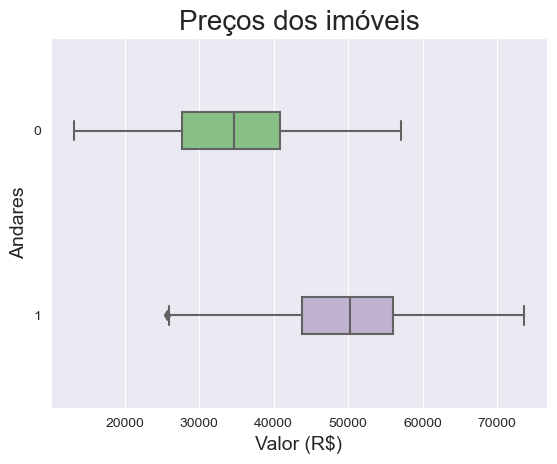

In [21]:
ax = sns.boxplot(y = 'andares', x = 'precos', data=dados, orient='h', width=0.2)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_xlabel('Valor (R$)', fontsize=14)
ax.set_ylabel('Andares', fontsize=14)
ax

C:\Users\Breno Wilio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências'}, xlabel='precos', ylabel='Valor do imóvel (R$)'>

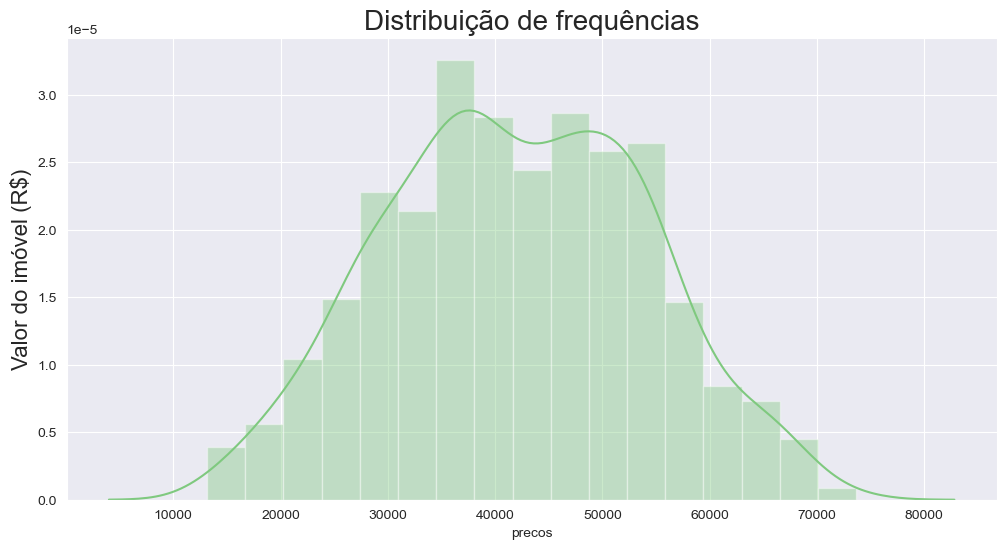

In [22]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências', fontsize=20)
ax.set_ylabel('Valor do imóvel (R$)', fontsize=16)
ax

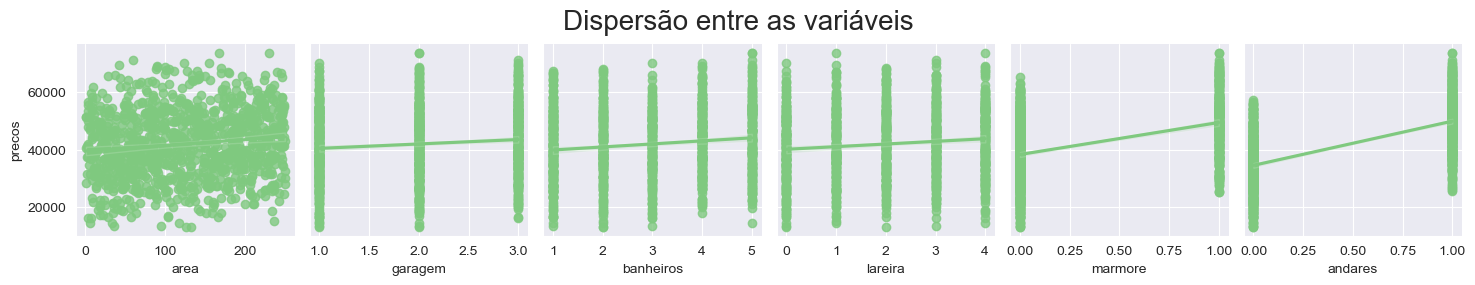

In [23]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
ax

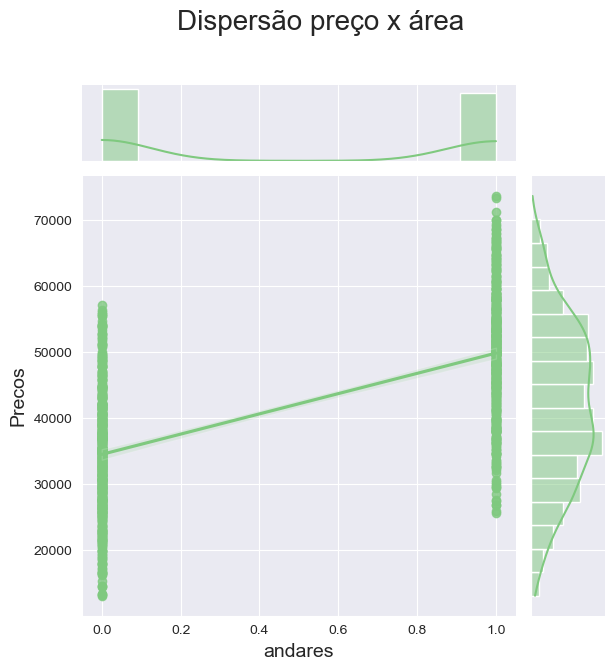

In [24]:
ax = sns.jointplot(y = 'precos', x = 'andares', data = dados, kind = 'reg')
ax.fig.suptitle('Dispersão preço x área', fontsize = 20, y = 1.1)
ax.set_axis_labels("andares", "Precos", fontsize = 14)
ax

### Estimando um Modelo de Regressão Linear

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = dados['precos']

In [27]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2811)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
modelo = LinearRegression()

In [31]:
modelo.fit(X_train, y_train)

LinearRegression()

In [32]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


In [33]:
y_previsto = modelo.predict(X_test)

In [34]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.67


### Criando um simulador simples

In [36]:
entrada = X_test[0:1]
entrada

,area,garagem,banheiros,lareira,marmore,andares
402,38,2,4,4,0,1


In [37]:
area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 1
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('{0:.2f} reais'.format(modelo.predict(entrada)[0]))

57521.57 reais


C:\Users\Breno Wilio\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Métricas de regressão

In [38]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R2'], columns = ['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R2,0.67


### Salvando e Carregando o Modelo Estimado

In [39]:
import pickle

In [40]:
output = open('modelo_preço', 'wb')
pickle.dump(modelo, output)
output.close()